# Quick Start

This document can tell you how to use sacpy to do Linear Regression quickly!

## import useful module

In [1]:
%load_ext autoreload
%autoreload 2
import sacpy as scp 
import xarray as xr

## Load Data

In [2]:
# load sst data
sst = scp.load_sst()['sst']
# get sst anomaly (ssta)
ssta = scp.get_anom(sst,method=0)

In [3]:
# get Nino3.4 Index
Nino34 = ssta.loc[:,-5:5,190:240].mean(("lon","lat"))
# Nino34.plot()

## Linear Regression and Plot

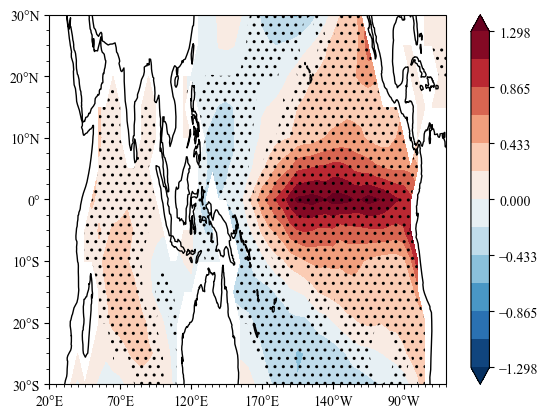

In [4]:
# Linear regression

LinReg = scp.LinReg(x=Nino34,y=ssta)
# plot the regression slope
import sacpy.Map
m,ax = LinReg.slope.splot(kw2={"stepx":50})
# plot significance test
ax.sig_plot(ssta.lon,ssta.lat,LinReg.p_value,thrshd=0.01)